In [260]:
import tweepy as tw
import config_twitter

In [261]:
# establish Twitter API connection
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [262]:
# returns False if credentials could not be verified, otherwise a user-object
# https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x12ca93e50>, _json={'id': 3068611967, 'id_str': '3068611967', 'name': 'mauricio', 'screen_name': 'Mautt_24', 'location': '', 'description': 'The only way is up💪🏻', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': True, 'followers_count': 26, 'friends_count': 34, 'listed_count': 0, 'created_at': 'Tue Mar 03 19:54:30 +0000 2015', 'favourites_count': 61, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 55, 'lang': None, 'status': {'created_at': 'Tue Jul 05 17:51:54 +0000 2022', 'id': 1544378549922140162, 'id_str': '1544378549922140162', 'text': '@Pabhupe Así te dices? El invicto?', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Pabhupe', 'name': 'Pablo Huerta', 'id': 248731235, 'id_str': '248731235', 'indices': [0, 8]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_r

In [263]:
import json

In [264]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [265]:
api = connect_api_client()

Connected to Twitter API as mauricio


In [266]:
# construct a search query
query = """"men perfume" OR "cologne" OR "men fragrance" 
          OR "men perfumes" OR "colognes" OR "men fragrances" 
          OR "perfumecologne" OR "men parfume" 
          OR "perfumecolognes" OR "men parfumes"-filter:retweets"""



In [267]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 2000

In [268]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets = [tweet._json for tweet in tw.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)


2000

In [269]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [270]:
# Twitter data analysis task starter.
import html
import string
import re
import nltk
from nltk.collocations import *
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [271]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [272]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [273]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Sun Jul 31 23:31:31 +0000 2022',
 'id': 1553886104671211521,
 'id_str': '1553886104671211521',
 'full_text': "and i could faintly smell like cologne which i couldnt smell before and i heard like idk a male voice but i couldn't really make out anything that was being said. i started to open my eyes slightly and it was all blurry but i could just see a freckly arm and a bit of a tshirt and",
 'truncated': False,
 'display_text_range': [0, 280],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': 1553885586339106816,
 'in_reply_to_status_id_str': '1553885586339106816',
 'in_reply_to_user_id': 1502694690935775234,
 'in_reply_to_user_id_str': '1502694690935775234',
 'in_reply_to_screen_name': 'theasmess',
 'user': {'id': 1502694690935775234,
  'id_str': '1502694

In [274]:
data[4]['full_text']

'Beginning - Kaoru Akimoto\nCologne - 1982 - 0:55\nNow playing on https://t.co/oXiWlJc7Gh\n#ballsackradio https://t.co/IyLWlYbl1R'

In [275]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,and i could faintly smell like cologne which i...
1,"The Cologne sky was yellow and rotting, flakin..."
2,@Fusion_Sword_CS //I suppose by that same vein...
3,@JustJeremyHeyYo Do I get rewarded with Dorito...
4,Beginning - Kaoru Akimoto\nCologne - 1982 - 0:...
...,...
1995,@kthnclss @bernardokath @imdanielpadilla Kathr...
1996,"From 5:21am-7:36am, this morning, Saturday, Ju..."
1997,@kthnclss @bernardokath @imdanielpadilla Kathr...
1998,@orlando_cologne @adamlambert Great edit!


In [276]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,and i could faintly smell like cologne which i...,0,0,theasmess
1,"The Cologne sky was yellow and rotting, flakin...",0,0,braincircus_bot
2,@Fusion_Sword_CS //I suppose by that same vein...,0,0,xKatamariPrince
3,@JustJeremyHeyYo Do I get rewarded with Dorito...,0,1,SuperblySantino
4,Beginning - Kaoru Akimoto\nCologne - 1982 - 0:...,0,0,BallsackFeed
...,...,...,...,...
1995,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,KN_dpkbf
1996,"From 5:21am-7:36am, this morning, Saturday, Ju...",0,0,RaviManickavas1
1997,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,ShmiKath
1998,@orlando_cologne @adamlambert Great edit!,0,1,regina_parsa


In [436]:
# text cleaning function: see prior class modules
stop_words = nltk.corpus.stopwords.words('english')
new_stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", 
                  "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", 
                  "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", 
                  "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", 
                  "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", 
                  "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", 
                  "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", 
                  "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", 
                  "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", 
                  "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", 
                  "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", 
                  "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", 
                  "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", 
                  "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", 
                  "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", 
                  "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", 
                  "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", 
                  "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", 
                  "consider", "considering", "contain", "containing", "contains", "corresponding", "could", 
                  "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", 
                  "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", 
                  "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", 
                  "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", 
                  "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", 
                  "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", 
                  "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", 
                  "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", 
                  "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", 
                  "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", 
                  "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", 
                  "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", 
                  "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", 
                  "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                  "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", 
                  "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", 
                  "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", 
                  "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", 
                  "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", 
                  "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", 
                  "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", 
                  "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", 
                  "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", 
                  "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", 
                  "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", 
                  "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", 
                  "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", 
                  "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", 
                  "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", 
                  "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", 
                  "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", 
                  "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", 
                  "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", 
                  "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", 
                  "much", "mug", "must", "mustn", "mustn't", "bitch", "my", "myself", "n", "n2", "na", "name", "namely", 
                  "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", 
                  "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", 
                  "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", 
                  "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", 
                  "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", 
                  "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", 
                  "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", 
                  "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", 
                  "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", 
                  "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", 
                  "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", 
                  "presumably", "previously", "primarily", "united states", "germany", "probably", "promptly", "proud", "provides", "ps", "pt", 
                  "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", 
                  "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", 
                  "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", 
                  "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", 
                  "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", 
                  "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", 
                  "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", 
                  "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", 
                  "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", 
                  "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", 
                  "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", 
                  "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", 
                  "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", 
                  "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", 
                  "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", 
                  "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", 
                  "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", 
                  "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", 
                  "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", 
                  "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", 
                  "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", 
                  "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", 
                  "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", 
                  "ut", "v", "va", "value", "various", "vd", "ve", "ve", "shit", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", 
                  "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", 
                  "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", 
                  "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", 
                  "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", 
                  "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", 
                  "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", 
                  "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", 
                  "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", "lotion","lotions","fragrance","fragrances","perfume","perfumes",
                  "cologne","colognes","perfumecologne","perfumecolognes","eau","parfum","parfums","scent","scents","cosmetic","cosmetics",
                  "cart","add","to","addtocart","personalcare","healthbeauty","scent",
                  "body","dont","dick","lol","people","buy","product","year","nice","apply","nigga","ass","gon",
                  "bus","guy","yall","leave","girl","started","women","check","men"]
stop_words.extend(new_stop_words)

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [437]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,and i could faintly smell like cologne which i...,0,0,theasmess,faintly smell smell heard idk male voice open ...,-0.166667,0.533333
1,"The Cologne sky was yellow and rotting, flakin...",0,0,braincircus_bot,sky yellow rotting flaking edges sat propped w...,0.000000,0.000000
2,@Fusion_Sword_CS //I suppose by that same vein...,0,0,xKatamariPrince,suppose vein spray manhole xd,0.000000,0.000000
3,@JustJeremyHeyYo Do I get rewarded with Dorito...,0,1,SuperblySantino,justjeremyheyyo rewarded doritos salvatore fer...,0.600000,0.900000
4,Beginning - Kaoru Akimoto\nCologne - 1982 - 0:...,0,0,BallsackFeed,kaoru akimoto 1982 playing ballsackradio,0.000000,0.000000
...,...,...,...,...,...,...,...
1995,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,KN_dpkbf,kthnclss bernardokath imdanielpadilla kathryn ...,0.000000,0.000000
1996,"From 5:21am-7:36am, this morning, Saturday, Ju...",0,0,RaviManickavas1,morning saturday july 30 2022 flossed brushed ...,-0.008333,0.420833
1997,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,ShmiKath,kthnclss bernardokath imdanielpadilla kathryn ...,0.000000,0.000000
1998,@orlando_cologne @adamlambert Great edit!,0,1,regina_parsa,adamlambert great edit,0.800000,0.750000


In [438]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,and i could faintly smell like cologne which i...,0,0,theasmess,faintly smell smell heard idk male voice open ...,-0.166667,0.533333
1,"The Cologne sky was yellow and rotting, flakin...",0,0,braincircus_bot,sky yellow rotting flaking edges sat propped w...,0.000000,0.000000
2,@Fusion_Sword_CS //I suppose by that same vein...,0,0,xKatamariPrince,suppose vein spray manhole xd,0.000000,0.000000
3,@JustJeremyHeyYo Do I get rewarded with Dorito...,0,1,SuperblySantino,justjeremyheyyo rewarded doritos salvatore fer...,0.600000,0.900000
4,Beginning - Kaoru Akimoto\nCologne - 1982 - 0:...,0,0,BallsackFeed,kaoru akimoto 1982 playing ballsackradio,0.000000,0.000000
...,...,...,...,...,...,...,...
1995,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,KN_dpkbf,kthnclss bernardokath imdanielpadilla kathryn ...,0.000000,0.000000
1996,"From 5:21am-7:36am, this morning, Saturday, Ju...",0,0,RaviManickavas1,morning saturday july 30 2022 flossed brushed ...,-0.008333,0.420833
1997,@kthnclss @bernardokath @imdanielpadilla Kathr...,0,0,ShmiKath,kthnclss bernardokath imdanielpadilla kathryn ...,0.000000,0.000000
1998,@orlando_cologne @adamlambert Great edit!,0,1,regina_parsa,adamlambert great edit,0.800000,0.750000


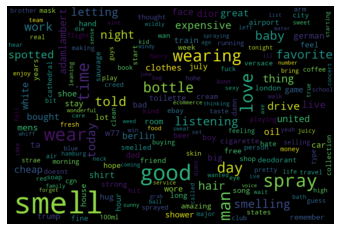

In [439]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_tweets['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [440]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)
kwords

{'faintly': 3,
 'smell': 280,
 'heard': 5,
 'idk': 6,
 'male': 6,
 'voice': 10,
 'open': 6,
 'blurry': 1,
 'freckly': 1,
 'bit': 14,
 'tshirt': 2,
 'sky': 2,
 'yellow': 3,
 'rotting': 1,
 'flaking': 1,
 'sat': 2,
 'propped': 1,
 'child': 4,
 'sister': 6,
 'stopped': 3,
 'breathing': 2,
 'stayed': 1,
 'sense': 11,
 'hold': 3,
 'stolen': 3,
 'pocket': 4,
 'suppose': 1,
 'spray': 62,
 'manhole': 1,
 'xd': 4,
 'justjeremyheyyo': 1,
 'rewarded': 1,
 'doritos': 2,
 'salvatore': 1,
 'ferragamo': 3,
 'amazing': 18,
 'btw': 5,
 'kaoru': 1,
 'akimoto': 1,
 'playing': 14,
 'ballsackradio': 1,
 'money': 14,
 'thinner': 1,
 'sean': 2,
 'goatee': 1,
 'hair': 11,
 'paul': 3,
 'gaultier': 3,
 'air': 11,
 'yeah': 12,
 'whipped': 1,
 'expensive': 19,
 'choose': 4,
 'bought': 15,
 'opinion': 2,
 'tea': 4,
 'carrying': 5,
 'extra': 3,
 'inhaler': 2,
 'case': 4,
 'forgot': 6,
 'pretending': 1,
 'eddie': 1,
 'munson': 1,
 'candle': 9,
 'sandlewood': 1,
 'damn': 17,
 'sewage': 1,
 'guys': 13,
 'type': 14,
 '

In [441]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
faintly,3
smell,280
heard,5
idk,6
male,6
...,...
brandmark logomark,2
logomark logomaker,2
logomaker graphicdesign,2


<AxesSubplot:xlabel='keyword'>

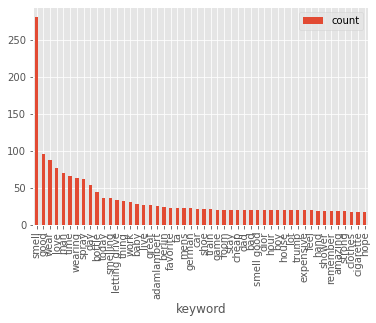

In [442]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(50).plot.bar()

In [443]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_tweets['text_clean']])

In [444]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [445]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('smell', 'smell'), 4),
 (('smells', 'amazing'), 3),
 (('june', '2018'), 5),
 (('2018', 'brightly'), 9),
 (('brightly', 'sunny'), 9),
 (('sunny', 'listening'), 9),
 (('letting', 'drive'), 33),
 (('drive', 'schildergasse'), 8),
 (('schildergasse', 'reaching'), 3),
 (('reaching', 'arms'), 8),
 (('arms', 'hug'), 8),
 (('hug', 'spotted'), 8),
 (('spotted', 'running'), 11),
 (('running', 'hohe'), 11),
 (('hohe', 'strae'), 15),
 (('strae', 'told'), 11),
 (('tom', 'ford'), 6),
 (('desperation', 'stinky'), 4),
 (('smells', 'good'), 11),
 (('woojin', 'kimwoojinworldtour'), 4),
 (('kim', 'woojin'), 3),
 (('kimwoojinworldtour', 'kimwoojin'), 3),
 (('guess', 'stay'), 3),
 (('stay', 'long'), 3),
 (('long', 'takes'), 3),
 (('takes', 'grab'), 3),
 (('grab', 'books'), 5),
 (('books', 'coat'), 5),
 (('coat', 'good'), 5),
 (('good', 'bought'), 5),
 (('bought', 'fighting'), 3),
 (('wdr', 'big'), 4),
 (('big', 'band'), 4),
 (('2018', 'wildly'), 11),
 (('wildly', 'windy'), 11),
 (('windy', 'listening'), 

In [446]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq.head(200)

,count
keyphrase,
letting drive,33
smell good,20
hohe strae,15
united states,15
w77 w77,14
...,...
mamiracoli celinevdc,4
drive park,4
greeders plunder,4


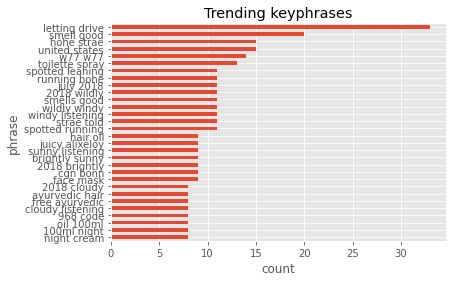

<Figure size 20000x10000 with 0 Axes>

In [447]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(30).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.figure(figsize=(100, 50), dpi=200)
plt.show()

In [448]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['ch','lacoste','ralph lauren','dolce','prada',
          'ferragamo','montblanc','paco rabanne','gucci',
          'chanel','dior','versace','hugo','armani','ck',
          'burberry','nautica','coach','mont blanc']


In [449]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,ch
1,lacoste
2,ralph lauren
3,dolce
4,prada
5,ferragamo
6,montblanc
7,paco rabanne
8,gucci
9,chanel


In [450]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("apple")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1,"The Cologne sky was yellow and rotting, flakin...",0,0,braincircus_bot,sky yellow rotting flaking edges sat propped w...,0.000000,0.000000
381,"@apexisu lap dance, my most prized possession ...",0,0,aliensinside,apexisu lap dance prized possession cracked fi...,0.000000,0.000000
745,"@mystic_dragongm Grandad’s pipe tobacco, Grand...",0,0,hopkinscricket,grandads pipe tobacco grandmas 4711 tomatoes g...,0.000000,0.000000
1323,"@heyMAKWA A combo of coffee, pipe tobacco, and...",0,12,SexyBurlapSack,heymakwa combo coffee pipe tobacco brut hits n...,0.255556,0.455556


In [451]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [452]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands.sort_values(by='average_sentiment', ascending=False)

,brand,average_sentiment
1,lacoste,0.600000
3,dolce,0.366667
5,ferragamo,0.358333
7,paco rabanne,0.196296
4,prada,0.175000
8,gucci,0.138368
15,burberry,0.127778
12,hugo,0.090667
0,ch,0.071232
14,ck,0.045498


In [453]:
# transform that dictionary into a pandas DataFrame
df_kwords_brands = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count'])
df_kwords_brands[df_kwords_brands['keyword'].isin(['ch','lacoste','ralph lauren','dolce','prada',
          'ferragamo','montblanc','paco rabanne','gucci',
          'chanel','dior','versace','hugo','armani','ck',
          'burberry','nautica','coach','mont blanc'])].sort_values(by='count', ascending=False)

,keyword,count
263,dior,19
988,versace,10
1556,gucci,8
6264,paco rabanne,5
635,prada,4
2474,chanel,4
34,ferragamo,3
980,burberry,3
1002,ck,3
1110,nautica,3


In [454]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
665,@MerianneJensen That's awesome.\n\nIf vaccines...,0,0,Genesis33K,meriannejensen awesome vaccines work working c...,1.0,1.0
951,@TonniGrube @OctaviaRmn @EMBO @mpipz_cologne C...,0,2,AleksVjestica,tonnigrube octaviarmn embo congratulations oct...,1.0,1.0
528,This “Victor &amp; Rolf Spice bomb” cologne I ...,0,0,I_Am_Bonolo,victor rolf spice bomb bought smells heavenly ...,1.0,1.0
1313,Harry called the Cologne crowd perfect and I w...,0,1,hesxsatellite,harry called crowd perfect recover,1.0,1.0
781,@orlando_cologne @adamlambert There he goes ag...,0,3,Susie99521909,adamlambert perfect,1.0,1.0
353,"What a weekend, Viersen! Thanks to all the won...",0,2,AnchorsHearts,weekend viersen wonderful ist busch festival a...,1.0,1.0
1285,Pino Silvestre Selection Perfect Gentleman by ...,0,0,addtocart,pino silvestre selection perfect gentleman pin...,1.0,1.0
120,It was a perfect blend of men’s cologne and wo...,0,0,dictaytorship,perfect blend mens womens,1.0,1.0
1172,Think I just stumbled upon a new cologne! Chil...,0,2,MajorPaynEX,stumbled chile smells real good,1.0,0.9
884,@diwatercolors @adamlambert Thx to the brillia...,0,0,orlando_cologne,diwatercolors adamlambert thx brilliant collab...,0.9,1.0


In [455]:
df_tweets.sort_values(by='polarity', ascending=True).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1185,🍸 Just tried GIN for the first time. That’s so...,8,141,ArsenioHall,gin time nasty taste sephora dior toilette,-1.0000,1.0
1570,Liverpool as a club are pathetic. From top to ...,0,1,Onengzy,liverpool club pathetic manager sprays hypocri...,-1.0000,1.0
685,also the same people who drown themselves in s...,0,5,sadkvlt,drown stinky shitty terrible substitute shower,-1.0000,1.0
64,"hamburg, munich, vienna and cologne, i am so i...",0,0,hloverry,hamburg munich vienna insanely grateful 3,-1.0000,1.0
1019,mad respect to women that can stomach debating...,0,16,MarxinMilan,mad respect stomach debating legalize prostitu...,-0.8125,1.0
556,"Hate running out of cologne, damn",0,1,treilogy,hate running damn,-0.8000,0.9
1708,I hate when a b**** perfume over smell my colo...,0,0,fiqboogiee,hate smell smell ya smell,-0.8000,0.9
910,@sighahh @xRoxxiReikax That's how I learned I ...,0,1,M_Morningstar13,sighahh xroxxireikax learned hate kids hate pa...,-0.8000,0.9
22,"@RexChapman In addition to the ❤️, retweet and...",0,3,jamesburnett,rexchapman addition retweet options appalled o...,-0.8000,1.0
613,@Kamil4Sir I mean they definitely have a stabl...,0,1,baertoasthunter,kamil4sir stable base met polish immigrant clu...,-0.8000,1.0


In [456]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
891,1. A set of new car tyres\n2. Full car servici...,546,965,_nkor_,set car tyres car servicing offer tint windows...,0.650000,0.875000
922,A moment to cherish. @SadhguruJV enjoys a musi...,222,444,SaveSoilBTS,moment cherish sadhgurujv enjoys musical koln ...,0.000000,0.000000
73,"💊| The Medicine Holy List (EU): \n✅ Oslo, 🇳🇴\n...",183,995,LTHSOURCE,medicine holy list oslo paris amsterdam munich...,0.416667,0.500000
1872,Voice Comms from the Cologne Grand Final are h...,124,2920,FaZeClan,voice comms grand final karrigancsgo,0.250000,1.000000
1873,"🔴 LIVE - BO5 Grand Finale Voice Comms., #IEM C...",97,1535,karriganCSGO,live bo5 grand finale voice iem fazeup,0.318182,0.750000
760,Biggest turn on for women:\n\n- Sense of humor...,78,457,DarkPsychForMen,biggest turn sense humor chivalry strength dre...,0.700000,0.550000
1932,"⚡️In Cologne, Germany, a rally was held today ...",68,315,Flash43191300,rally held today protection murder children uk...,0.000000,0.000000
799,#lrt https://t.co/WdYBavlb7t wrote down the pe...,65,247,centergaon,lrt wrote nowadays thought fans lush pansy jo ...,0.200000,0.412500
1709,Is 2022 the year of FaZe?\n\nThe European team...,59,2403,HLTVorg,2022 faze european team desire major esl pro l...,-0.112500,0.300000
1771,Rollerball Cologne would be a great gift for a...,47,47,tionneskin,rollerball great gift variety woodsy citrusy f...,0.550000,0.875000


In [457]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20)['user']

891              _nkor_
922         SaveSoilBTS
73            LTHSOURCE
1872           FaZeClan
1873       karriganCSGO
760     DarkPsychForMen
1932      Flash43191300
799          centergaon
1709            HLTVorg
1771         tionneskin
1068       dohyoungpark
343        TheSabiRadio
928              4pf_DT
1422      hsfasharchive
1781            1mp3xis
907     orlando_cologne
1532     ShoybArifMalik
840     orlando_cologne
1199          sushib0mb
1993           jefff256
Name: user, dtype: object

In [458]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

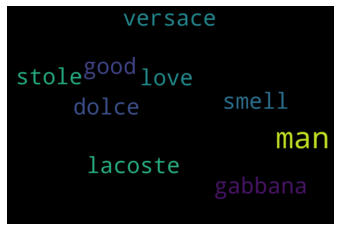

In [459]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'lacoste'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

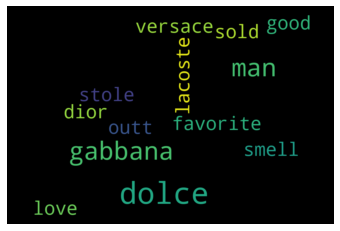

In [460]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'dolce'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

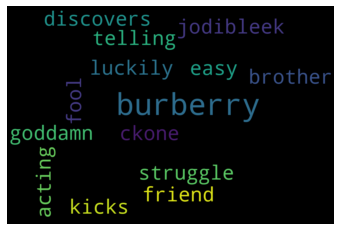

In [461]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'burberry'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

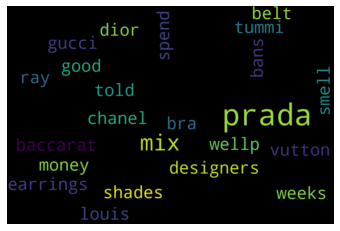

In [462]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'prada'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

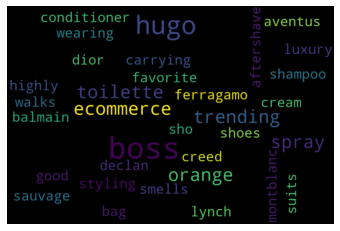

In [463]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'hugo'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

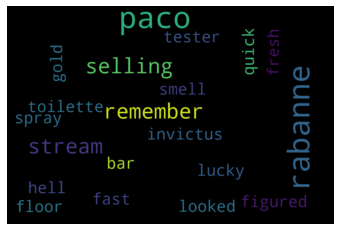

In [464]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'paco rabanne'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

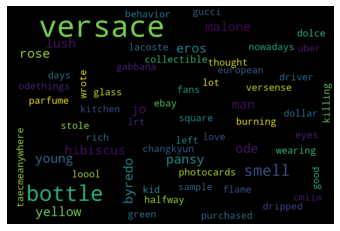

In [465]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'versace'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

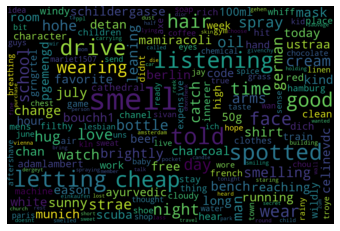

In [466]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'ch'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

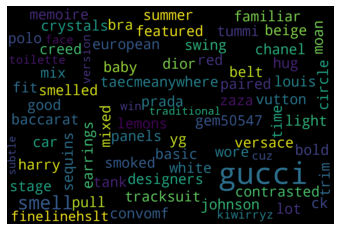

In [468]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'gucci'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

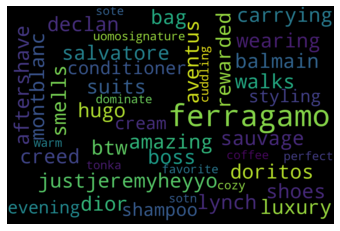

In [469]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'ferragamo'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

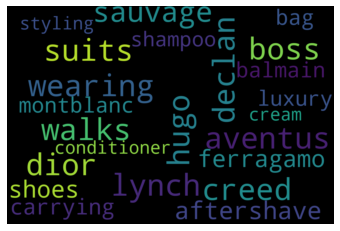

In [470]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'montblanc'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

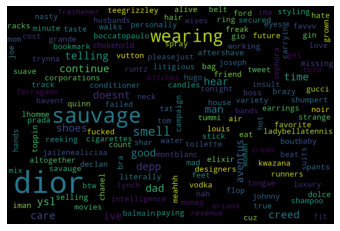

In [471]:
# most common tuet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'dior'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()